## Autores:

Luiza Lober de Souza Piva, nUSP: 9302292

Ricardo Camacho Tetti, nUSP: 10728098

**Rascunho**: Falta fazer
*   Aplicar os cálculos que estão feitos da Q3 em diante nas redes novas
*   Ver se as contas estão certas mesmo :p
*   A Q5 é realmente só explicar o gráfico? Não tenho certeza.

In [130]:
#Configurações

import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

#puxar arquivos do GitHub
import requests as rq
from io import BytesIO

# Redes a serem usadas

**Para o Ricardo**: usei as mesmas fontes do trabalho passado, só mudando o filme da rede 3.

Dá trabalho D+++++++ procurar redes novas, e essas funcionam. Se tiver alguma sugestão nova, só avisar~

In [25]:
def PlotLargeGraph(big_graph):
  pos=nx.spring_layout(big_graph)
  nx.draw(big_graph, with_labels = False, node_size=50, node_color = "darkblue", edgecolors = "lightgray", alpha=0.2, font_size=16, pos = pos)
  plt.show(True)

In [23]:
#Parâmetros para teste
av_degree = 8
n_nodes = 500
p = 1 #probability of rewiring
SW_n_length = 20 #-> 400 nos
SW_diam = 1
SW_connections = 1
SW_exponent_r = 2
SW_dimension = 2

set_seed = 42

#Rede de teste: Watts-Strogatz
k = int(av_degree/2)
G_teste = nx.watts_strogatz_graph(n_nodes, k, p, seed=None)

#Rede de teste direcionada: Small-World
#---> Vamos usar aqui a versão navegável da NetworkX
G_SW = nx.navigable_small_world_graph(n=SW_n_length, p=SW_diam, 
                                            q=SW_connections, r=SW_exponent_r, 
                                            dim=SW_dimension, seed=set_seed)

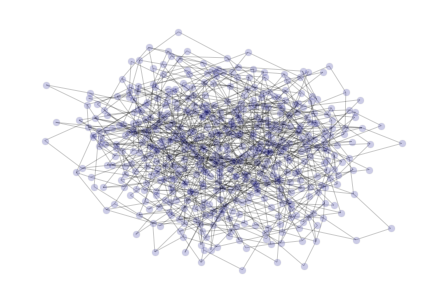

In [21]:
#Rede de teste: Watts-Strogatz
PlotLargeGraph(G_teste)

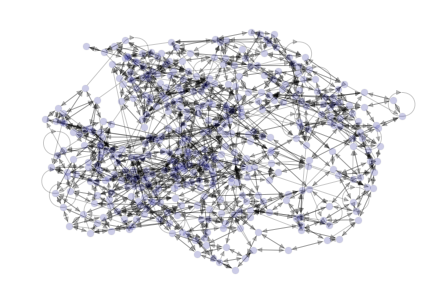

In [26]:
#Rede de teste direcionada: Small-World
PlotLargeGraph(G_SW)

### (Com direção) Rede de confiança de médicos

Uma rede que mostra as relações de confiança entre médicos de quatro cidades do meio-oeste dos Estados Unidos. As direções indicam que um dado nó *i* confia ou pede conselhos para um nó *j*.

Descrição do arquivo:

*    241 vértices/nós (médicos);
*    1098 conexões/arestas (confiança);
*    Não há loops;
*    Rede com pesos (weighted), **com direção**.

Rede disponível em https://downloads.skewed.de/mirror/konect.cc/files/download.tsv.moreno_innovation.tar.bz2

Mais informações: http://www.jstor.org/stable/2785979

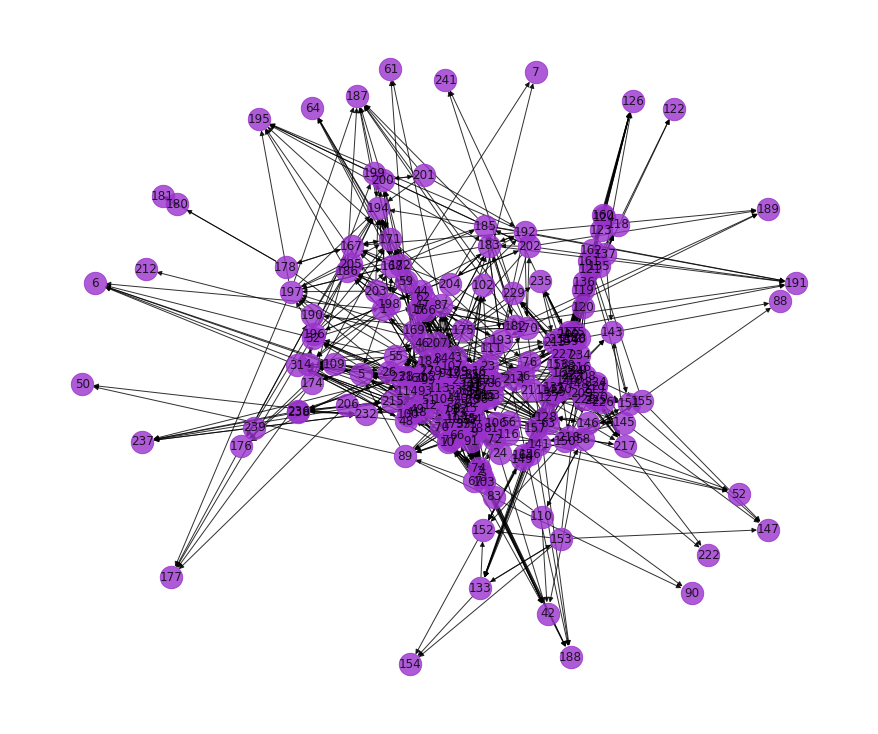

In [141]:
#Lê o grafo
url = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/redes-comp-2s2022/data/trab-1/out.moreno_innovation_innovation.txt'
data = rq.get(url).content
G1 = nx.read_edgelist(BytesIO(data), create_using=nx.DiGraph())

#Grafica a representação gráfica do grafo G3
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color="darkorchid", node_size=500, with_labels=True, alpha=0.8)

### (Com direção) Centrality literature network

Uma rede descrevendo citações dentro do assunto "centralidade em ciência de redes complexas" dos anos 1948 a 1979.

Descrição do arquivo:

*   129 vértices/nós (publicações);
*   613 conexões/arestas (citações apontando para o artigo citado);
*   Não há loops;
*   Rede com pesos (weighted)
*   Valores das linhas: 
   *  1 - citações simples, 
   *  2 - citações duplas, o que é possível se o artigo citado ou que faz a citação se refere a dois artigos combinados em um único vértice


Rede disponível em [http://vlado.fmf.uni-lj.si/pub/networks/data/esna/centrality.htm](http://vlado.fmf.uni-lj.si/pub/networks/data/esna/centrality.htm)

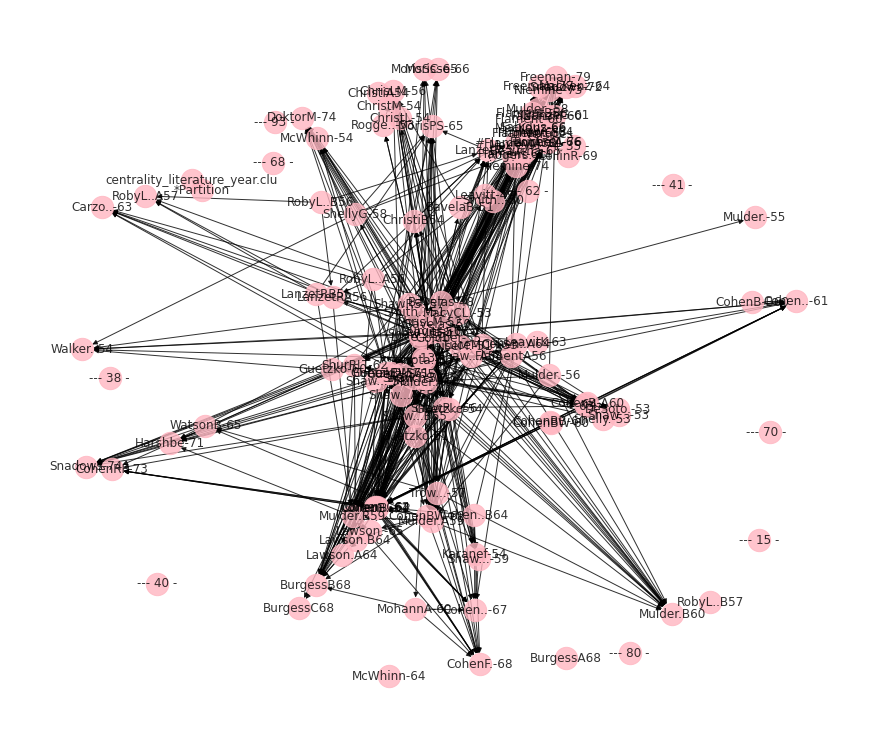

In [142]:
 #Lê a rede
url = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/redes-comp-2s2022/data/trab-1/centrality_literature.paj'
data = rq.get(url).content
G1= nx.read_pajek(BytesIO(data))

#Grafica a representação gráfica do grafo G1
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color="lightpink", node_size=500, with_labels=True, alpha=0.8)

### (Sem direção) Moviegalaxies - Social Networks in Movies - no.828

Rede no. 828 do dataset, representando as interações cena-a-cena dos personagens de Titanic.

Descrição do arquivo:

*    72 vértices/nós (personagens);
*    547 conexões/arestas (interações na mesma cena);
*    Não há loops;
*    Rede com pesos (weighted), **sem direção**.


Rede disponível em [https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T4HBA3](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T4HBA3)

Maiores informações (metadata): [https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/T4HBA3/NGCUG9&version=3.0](https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/T4HBA3/NGCUG9&version=3.0)

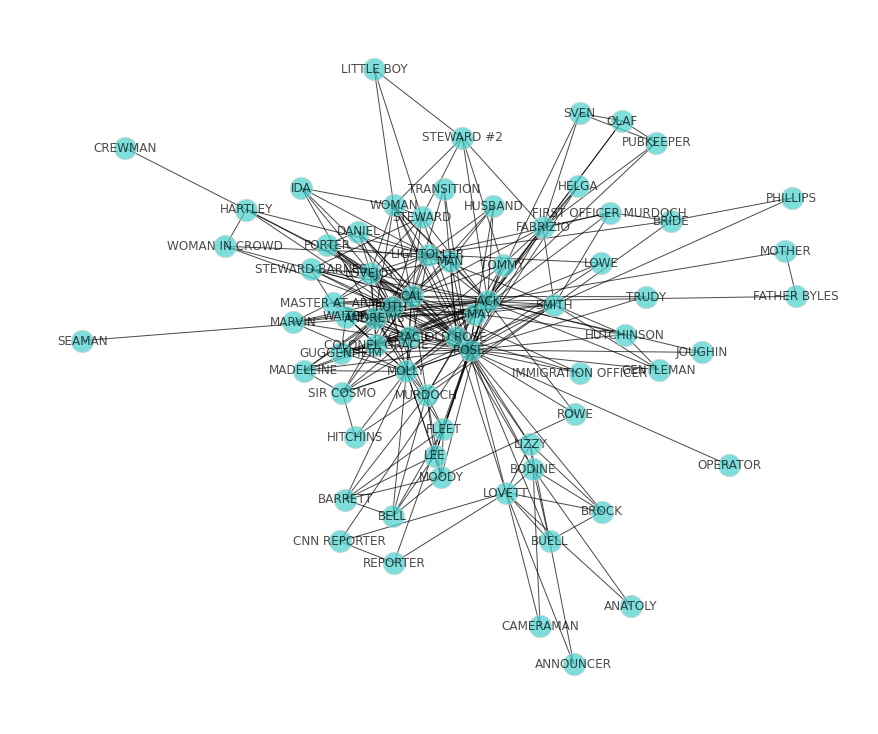

In [140]:
#Lê o arquivo
url = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/redes-comp-2s2022/data/trab-2/828.gexf'
data = rq.get(url).content
G3 = nx.read_gexf(BytesIO(data), relabel=True)

#Grafica a representação gráfica do grafo G2
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G3)
nx.draw(G3, pos, node_color="mediumturquoise", node_size=500, with_labels=True, edgecolors= 'lightgray', alpha=0.7)

# Q1

Calcular e plotar P(k), i.e. a distribuição de probabilidade do grau. P(k) representa a probabilidade de que um vértice possua grau igual a k. Mostre este gráfico em escala log-log. Para as redes direcionadas, mostrar P(k_in) e P(k_out) (distribuição dos graus de entrada e saída)

In [3]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) 
    Pk = np.zeros(maxk+1)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk)
    return kvalues,Pk

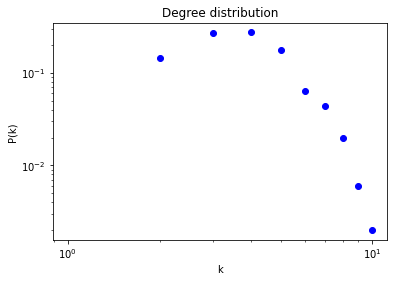

In [4]:
ks, Pk = degree_distribution(G_teste)

fig = plt.subplot(1,1,1)
fig.set_xscale('log')
fig.set_yscale('log')
plt.plot(ks,Pk,'bo')
plt.xlabel("k")
plt.ylabel("P(k)")
plt.title("Degree distribution")
#plt.savefig('degree_dist.eps') #save the figure into a file
plt.show()

# Q2

Calcular a centralidade de autovetores para todas as redes. Qual a correlação (Pearson) entre a centralidade de autovetores e o grau? Mostre o valor da correlação e os respectivos scatter-plots (eixo-x = grau do vértice, eixo y = centralidade de auto-vetor 
do vértice).

In [5]:
EC = dict(nx.eigenvector_centrality(G_teste, max_iter = 1000))

EC = list(EC.values())
av_EC = np.mean(EC)
print('Average eigenvector centrality', av_EC)

Average eigenvector centrality 0.03983462842832312


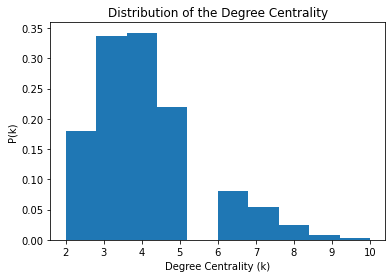

In [8]:
vk = dict(G_teste.degree())
vk = list(vk.values())

plt.figure(figsize=(6,4))
plt.hist(vk, density=True)
plt.title("Distribution of the Degree Centrality")
plt.ylabel("P(k)")
plt.xlabel("Degree Centrality (k)")
#plt.grid(True)
plt.savefig('degree-centrality.eps')
plt.show()

In [9]:
pearson = sp.stats.pearsonr(EC,vk)
print(pearson)

(0.7971342580201579, 3.4403205780832576e-111)


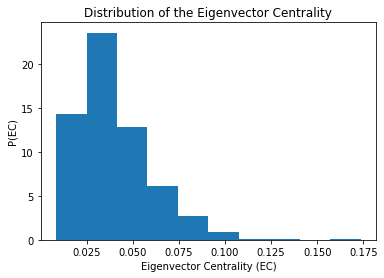

In [10]:
plt.figure(figsize=(6,4))
plt.hist(EC, density=True)
plt.title("Distribution of the Eigenvector Centrality")
plt.ylabel("P(EC)")
plt.xlabel("Eigenvector Centrality (EC)")
plt.savefig('eigenvector.eps')
plt.show()

# Q3

Para as redes direcionadas, verifique se existem vértices com centralidade nula mesmo quando há conexões de entrada.

In [32]:
#No caso de redes direcionadas, há diferença entre a centralidade de entrada e de saída.
centralidade_entrada = nx.in_degree_centrality(G_SW)
print(centralidade_entrada)

centralidade_saida = nx.out_degree_centrality(G_SW)
print(centralidade_saida)

print('Os dois são iguais?', centralidade_entrada == centralidade_saida)

{(0, 0): 0.005012531328320802, (0, 1): 0.012531328320802004, (1, 0): 0.007518796992481203, (2, 1): 0.012531328320802004, (0, 2): 0.007518796992481203, (1, 1): 0.010025062656641603, (0, 3): 0.010025062656641603, (1, 2): 0.012531328320802004, (0, 4): 0.012531328320802004, (1, 3): 0.010025062656641603, (0, 5): 0.010025062656641603, (1, 4): 0.015037593984962405, (3, 3): 0.015037593984962405, (0, 6): 0.007518796992481203, (1, 5): 0.012531328320802004, (2, 5): 0.017543859649122806, (0, 7): 0.015037593984962405, (1, 6): 0.010025062656641603, (7, 8): 0.012531328320802004, (0, 8): 0.012531328320802004, (1, 7): 0.015037593984962405, (0, 9): 0.010025062656641603, (1, 8): 0.010025062656641603, (0, 10): 0.012531328320802004, (1, 9): 0.012531328320802004, (0, 11): 0.007518796992481203, (1, 10): 0.012531328320802004, (0, 12): 0.007518796992481203, (1, 11): 0.010025062656641603, (0, 13): 0.007518796992481203, (1, 12): 0.012531328320802004, (0, 14): 0.010025062656641603, (1, 13): 0.010025062656641603, 

In [44]:
#Agora, vamos checar os valores nulos, se existirem
nos_cent_nula_1 = []
nos_cent_nula_2 = []

for keys in centralidade_entrada:
    if centralidade_entrada[keys] == 0:
      nos_cent_nula_1.append(keys)

for keys in centralidade_saida:
    if centralidade_saida[keys] == 0:
      nos_cent_nula_2.append(keys)

print('Nós com centralidade nula de entrada:', len(nos_cent_nula_1))
print('Nós com centralidade nula de saída:', len(nos_cent_nula_2))

Nós com centralidade nula de entrada: 0
Nós com centralidade nula de saída: 0


# Q4

Mostrar o scatter plot de grau (i.e. número de vizinhos) vs. acessibilidade (calculada) no nível hierárquico h=1 

**Acessibilidade**: vou assumir que é $\alpha$, com $α = 1/k$, onde $k$ são os autovetores calculados através de `nx.eigenvector_centrality()`

**Nível hierárquico $h=1$**: primeiros vizinhos (se entendi certo)

Obs: como não foi especificada a rede, acho que vale fazer para todas.

In [95]:
#Calcula o grau:
#-> algumas conversões de tipo são feitas para melhor acesso aos valores
ks_swp = dict(G_teste.degree())
ks_teste = list(ks_swp.values())
ks_swp = dict(G_SW.degree())
ks_SW = list(ks_swp.values())

#Calcula centralidade:
cent_teste = dict(nx.eigenvector_centrality(G_teste, max_iter = 1000))
cent_SW = dict(nx.eigenvector_centrality(G_SW, max_iter = 1000))

#Calcula a acessibilidade
access = {k: 1/v for k, v in cent_teste.items()}
access_teste = list(access.values())
access = {k: 1/v for k, v in cent_SW.items()}
access_SW = list(access.values())

Abaixo, os gráficos pedidos:

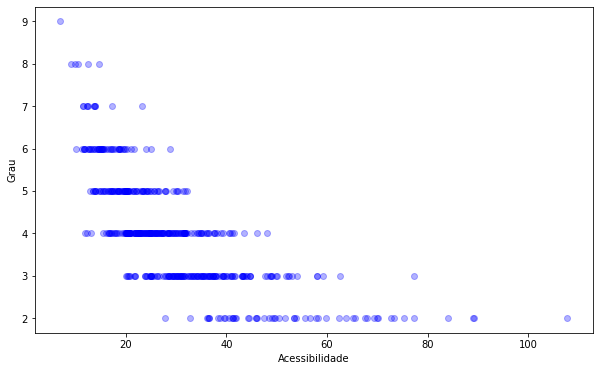

In [101]:
#Para a rede de Watts-Strogatz
fig = plt.figure(figsize=(10, 6))
#ig.set_yscale('log')
plt.plot(access_teste, ks_teste,'bo', alpha=0.3)
plt.xlabel("Acessibilidade")
plt.ylabel("Grau")
plt.show()

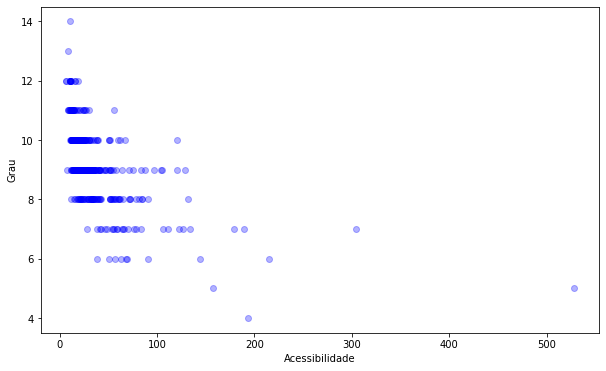

In [102]:
#Para a rede Small-World
fig = plt.figure(figsize=(10, 6))
#ig.set_yscale('log')
plt.plot(access_SW, ks_SW,'bo', alpha=0.3)
plt.xlabel("Acessibilidade")
plt.ylabel("Grau")
plt.show()

# Q5

A partir de 1), mostrar exemplos de vértices que possuam acessibilidade muito menor que o número de vértices. 

In [10]:
#Visto acima...?
#---> Existem vértices de grau mais alto com acessibilidade na ordem de 10^1,
#que é uma ordem de grandeza menor que o número total de vértices.

# Q6

Calcule a correlação de rank (Spearman correlation coeficiente) obtida entre o grau e a centralidade Katz, para qualquer valor adequado de alpha (i.e. um alpha que garante convergência da medida de centralidade).

In [110]:
#Calculando o ranque (mesma da Q2)

#Rede de Watts-Strogatz
vk_teste = dict(G_teste.degree())
vk_teste = list(vk_teste.values())

EC_teste = dict(nx.eigenvector_centrality(G_teste, max_iter = 1000))
EC_teste = list(EC_teste.values())

#Rede Small-World
vk_SW= dict(G_SW.degree())
vk_SW = list(vk_SW.values())

EC_SW = dict(nx.eigenvector_centrality(G_SW, max_iter = 1000))
EC_SW = list(EC_SW.values())

In [109]:
#Calculando a centralidade Katz
#--> parâmetros padrão em alpha, beta, max_iter e normalização
#O cálculo converge para estes parâmetros.

katz_teste = nx.katz_centrality(G_teste, alpha=0.1, beta=1.0, max_iter=1000, normalized=True)
katz_SW = nx.katz_centrality(G_SW, alpha=0.1, beta=1.0, max_iter=1000, normalized=True)

In [113]:
#Correlações:

spearman_teste = sp.stats.spearmanr(EC_teste, vk_teste)
print('Rede Watts-Strogatz:', spearman_teste)

spearman_SW = sp.stats.spearmanr(EC_SW, vk_SW)
print('Rede Small-World:', spearman_SW)

Rede Watts-Strogatz: SpearmanrResult(correlation=0.8043789632594853, pvalue=1.0845726061718324e-114)
Rede Small-World: SpearmanrResult(correlation=0.6371319719777108, pvalue=6.145654603022632e-47)
